## Silver data analysis

Based on the data for the refractive index for silver obtained from [Johnson and Christy, 1972](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.6.4370) we dicide to dig deeper on the option for interpolation. 

* Data interpolation decision
* Experimental data analysis 

### Data interpolation desicion

We try linear and a spline interpolation. We use the module `scipy.interpolate` in particular [`interp1d`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp1d.html) for the linear interpolation and, [`splrep`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html) and [`splev`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html) for the splines .

In [1]:
import numpy 
%matplotlib notebook

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
from data_analysis_helper import plot_refrac , linear_interp, spline, spline_eval, plot_interpolation

In [4]:
#Importing silver data
#Format: wavelength, refrac_index_real (n), refrac_index_complex (k) 

lambda_s , n_s , k_s = numpy.loadtxt('gold_silver_water_raw-data/silver_JC72_nm.txt', unpack=True)

### Plot of the raw data

<IPython.core.display.Javascript object>


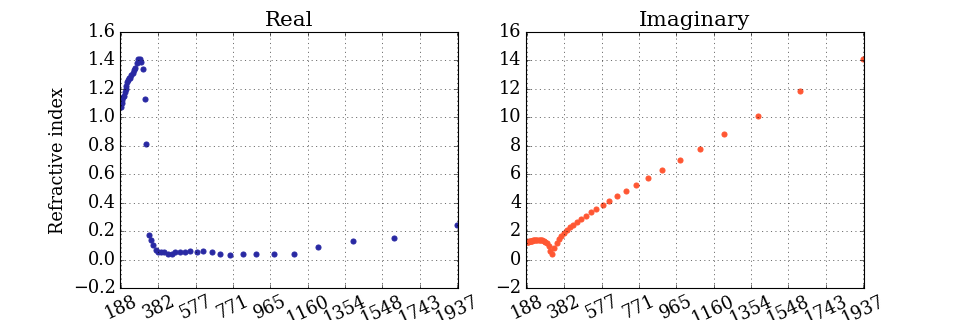

In [5]:
plot_refrac(lambda_s, n_s, k_s)

In [6]:
#linear interpolation
silver_real_linear , silver_imag_linear = linear_interp(lambda_s, n_s, k_s)

#get spline 
silver_real_tuple, silver_imag_tuple = spline(lambda_s, n_s, k_s)

#spline evaluation
lambda_x = numpy.linspace(min(lambda_s), max(lambda_s), num=500, endpoint=True)
silver_real_spline, silver_imag_spline = spline_eval(lambda_x, silver_real_tuple, silver_imag_tuple)

In [7]:
#Need this for convergence test input data. 
ref_silver_380 = silver_real_linear(380) + 1j * silver_imag_linear(380)
diel_silver_380 = ref_silver_380 * ref_silver_380

In [8]:
diel_silver_380

(-3.3876520488233184+0.19220746083441781j)

<IPython.core.display.Javascript object>


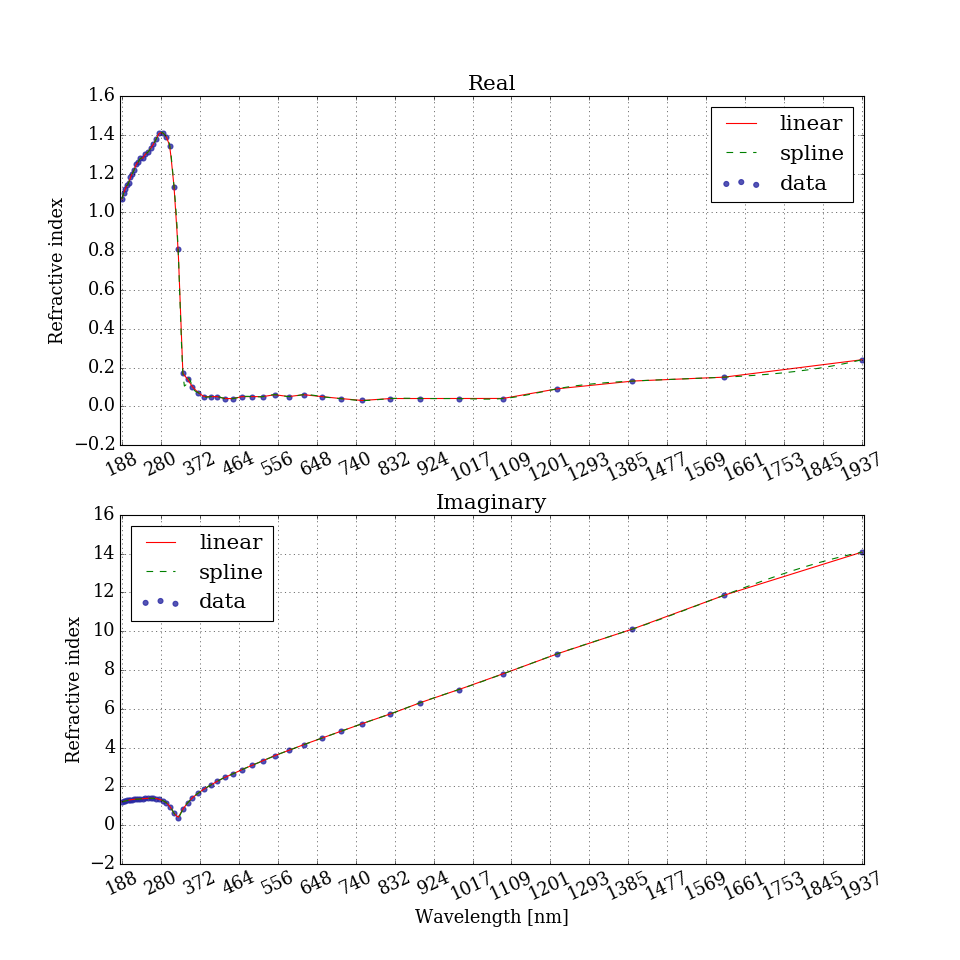

In [9]:
plot_interpolation(lambda_s, n_s, k_s, lambda_x, silver_real_linear, 
                   silver_imag_linear, silver_real_spline, silver_imag_spline)


### Plot difference between linear and spline

Let's plot the difference between each interpolation and compare this difference with the experimental errors reported in the paper.

In [10]:
silv_diff_real = abs(silver_real_linear(lambda_x) - silver_real_spline) 
silv_diff_imag =  abs(silver_imag_linear(lambda_x) - silver_imag_spline)


<IPython.core.display.Javascript object>


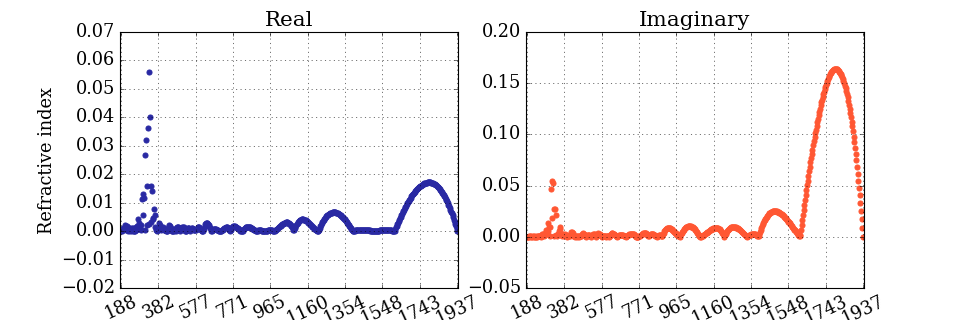

In [11]:
plot_refrac(lambda_x, silv_diff_real, silv_diff_imag)

Notice that depending on the wavelength range, the difference between the two types of interpolation can be relevant or not, compared to the experimental error. 
For the Fig 7.5 in Christopher Cooper's thesis the wavelngth varies from 360 nm to 420 nm. In this range, for the real part it's obvious that the experimental error (0.02) is bigger than the difference that we can appreciate in the plot. In the case of the imaginary component we can see that the difference in the interpolation and the experimental error (0.007) are in the same order of magnitud. In both cases a linear interpolation is a good approximation, since the difference between this interpolation and a one from higher order (spline) is smaller (real case) or in the order of magnitud (imaginary case) of the experimental error. 